# Risk prediction on credit card default
--Decoding Credit Card Default Risks\
Xianhai Li\
Feb/28/2024

# Abstract
In this project, I'll dig into a dataset to figure out how we can tell if someone might be likely to miss their credit card payments. It's also a great opportunity to practice using machine learning in a hands-on way!\
*The present file has been uploaded to my GitHub Repository, and you can find it: [Introduction_to_Machine_Learning_Supervised_Learning](https://github.com/StevenLi198802/Introduction_to_Machine_Learning_Supervised_Learning)*

# Introduction
When I arrived in Japan as a newcomer, I faced challenges obtaining a credit card, despite having a decent credit history. This led me to question the criteria credit card issuers use to assess risk. Recognizing the global prevalence of credit, it's not only the issuers who need to evaluate risk, but users must also be vigilant about their potential default risk. In this project, I aim to unravel the factors influencing credit card default risk.

# Related Work
While numerous studies have explored similar themes using the same dataset, I opt to undertake this project independently. It serves as a valuable opportunity to apply the knowledge gained in this course. I find joy in uncovering insights step by step on my own. The dataset I'll be using is outlined below.\
[Credit Card Fraud Detection Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023)


# Main Tasks

## Data Collection
The dataset used in this project is from the Kaggle.
[Credit Card Fraud Detection Dataset 2023](https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023)
I downloaded it from the link above.
From the data resources, we know the following information about the dataset:
### Description:
This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.
### Key Features:
* id: Unique identifier for each transaction
* V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
* Amount: The transaction amount
* Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)

In [ ]:
# I uploaded the csv file to the specific path. Please confirm if the file is there before runing the following code to load the data.

import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/creditcard_2023.csv")

# Check the data shape after loading
print("Shape after loading from the resource file: ",df.shape)
# Let me check the data info
df.info()

Shape after loading from the resource file:  (568630, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  flo

In [ ]:
# Since all the fields are numerous type data, Let me use describe function to check its numerous information.
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
# We have checked via the data.info(), that there is No missing values, but we can still check it with another way.
df.isna().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Exploratory Data Analysis
### Data Verification
1. Data Shape Verification:\
Upon thorough examination, the data shape is confirmed to be ***(568630, 31)***
2. Variable Data Types:\
A detailed analysis reveals that all variables, with the exception of ***id*** and ***Class***, are of float type. The ***id*** variable functions as a primary key, while ***Class*** serves as the target field with binary values. Specifically, 1 denotes a customer default, and 0 signifies that the customer is in good standing.
3. Handing Missing Data:\
Noteworth is the absence of missing values within the dataset, obviatinng the necessity for any missing data handling procedures.

### Data Distribution
There are several ways to check the data distribution.
Here I will employ histograms and violin plots.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

fig, ax = plt.subplots(len(df.columns),2,figsize=(10, len(df.columns)*6))
for idx, column in enumerate(df.columns):
  # Plot a histogram
  sns.histplot(x=column, hue="Class", data=df, bins=30, kde=True, palette='muted', ax=ax[idx,0])
  ax[idx,0].set_title(f'Histogram for {column}')

  # Plot a violin plot
  sns.violinplot(x="Class", y= column, hue="Class", data = df, palette='deep', ax=ax[idx,1])
  ax[idx, 1].set_title(f'Violin Plot for {column} across Class')

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

* Upon the eximination above, it is evident that the
majority of features do not exhibit significant skewness.
* However, the dataset displays a varied range of values. To address this, we will proceed with rescaling the data.
* Prior to performing the rescaling operation, it is essential to exclude both the ***id*** and ***Class*** from our set of feature variables.



In [ ]:
from sklearn.preprocessing import RobustScaler

# Create the features variable
X = df.drop(['id','Class'], axis = 1)
y = df[['Class']]

# StandardScaler, MinMaxScaler, and RobustScaler are different scaling techniques
# used in preprocessing data for machine learning models.
# I will choose RobustScaler instead of other two,
# mainly because it less sensitive to outliers as it uses the median and IQR.
cols = X.columns
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X[cols])

After rescaling, we can check the correlation between features and the target variable. Let's plot a heatmap of the correlation matrix.

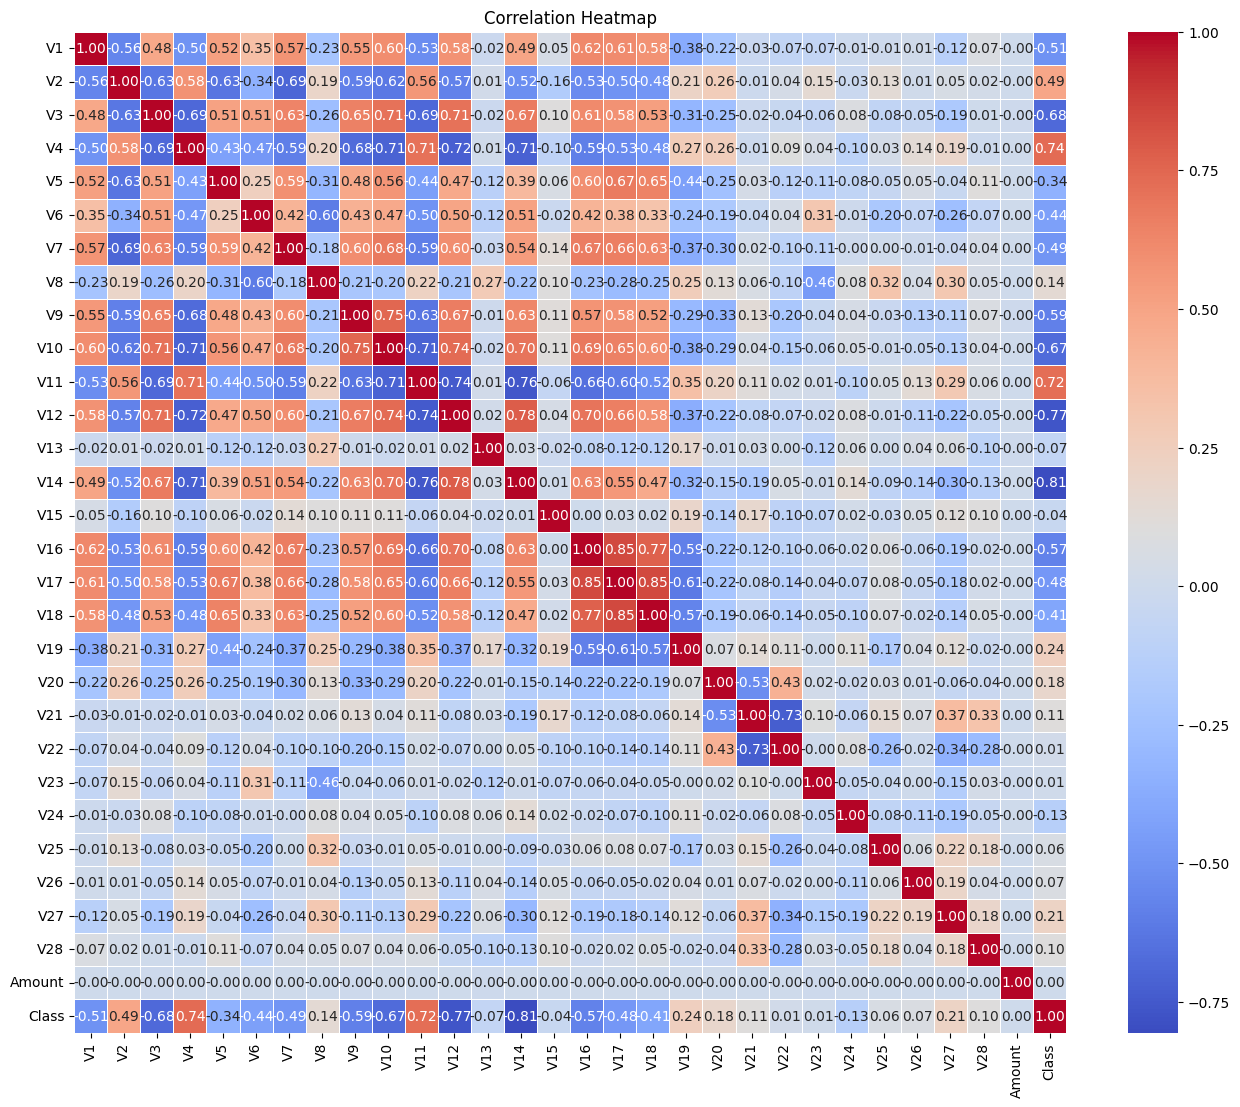

In [ ]:
# Concatenate the scaled features and the target variable
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
data_scaled = pd.concat([X_scaled, y], axis=1)

# Calculate the correlation matrix
correlation_matrix = data_scaled.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(16, 13))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Derived from the visual analysis of the heatmap, notable correlations are observed:
1. There exists a pronounced positive correlation among V12, V14, V16, V17, and V18.
2. A distinct negative correlation is identified between V11 and V12.

We can show the histgrams and violin plots again with the scaled features.

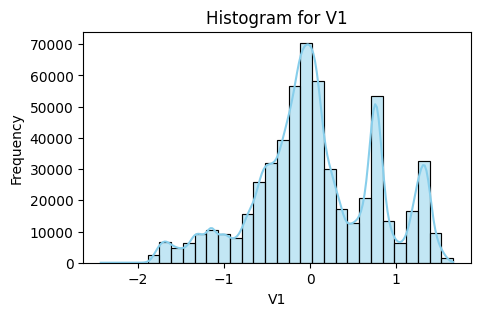

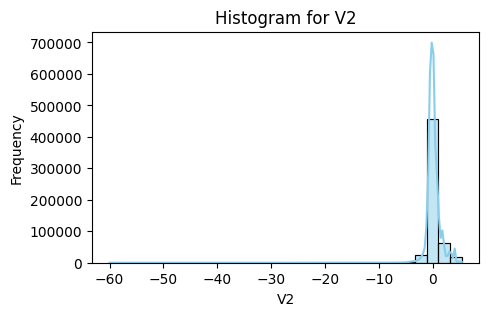

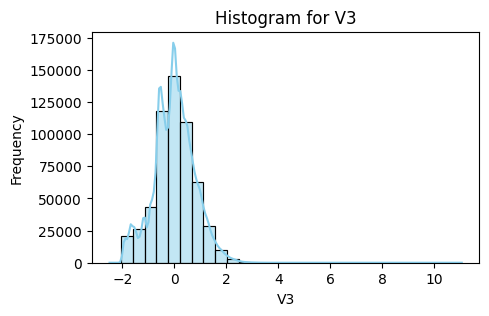

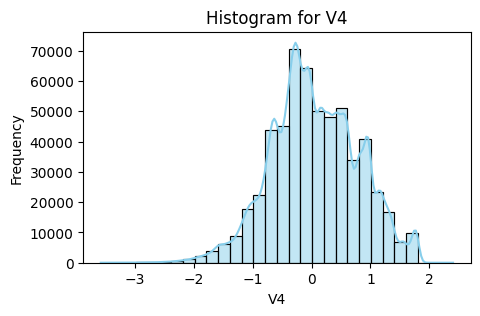

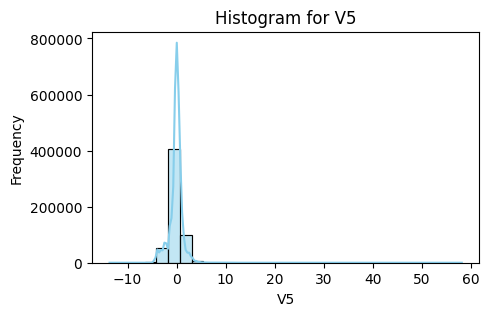

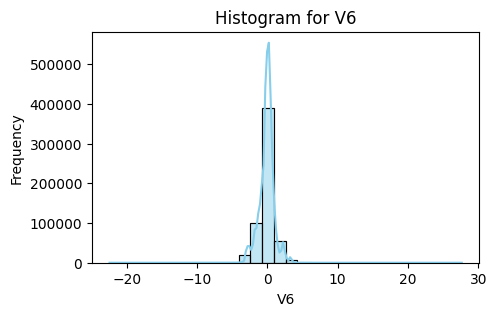

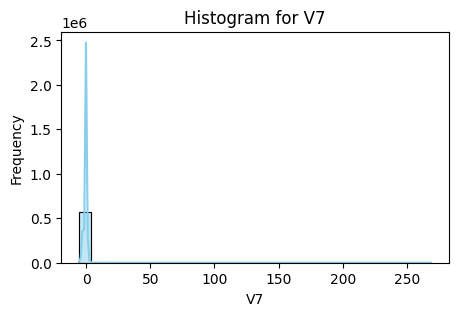

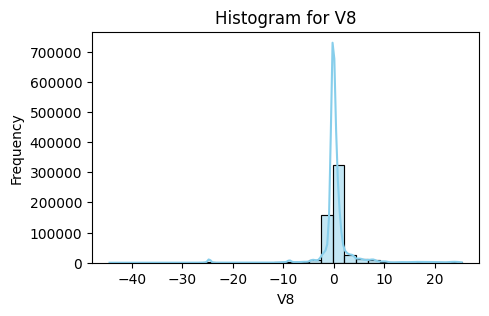

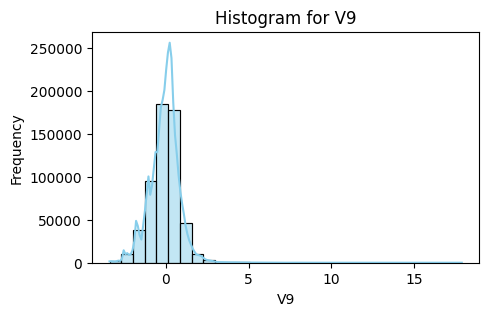

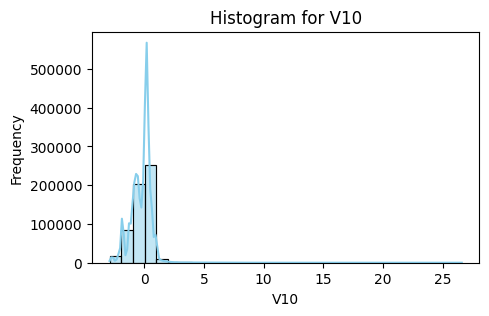

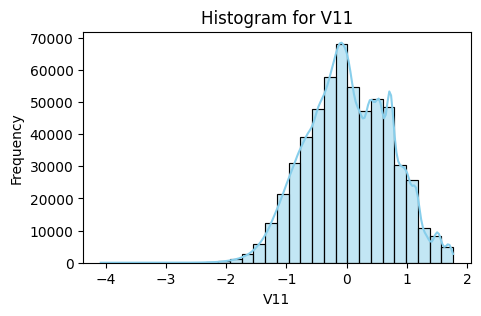

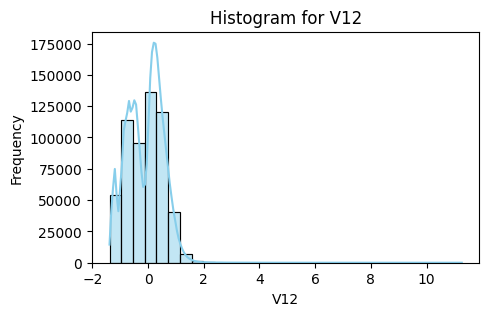

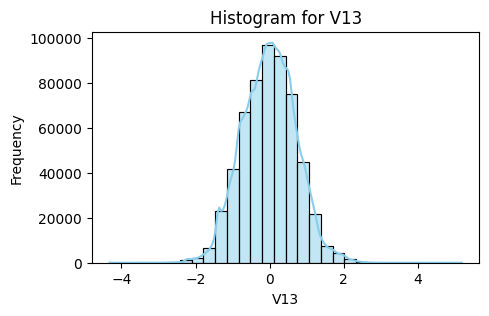

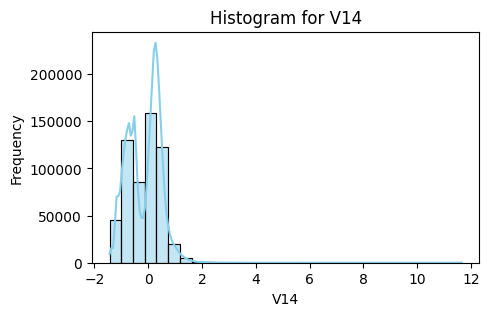

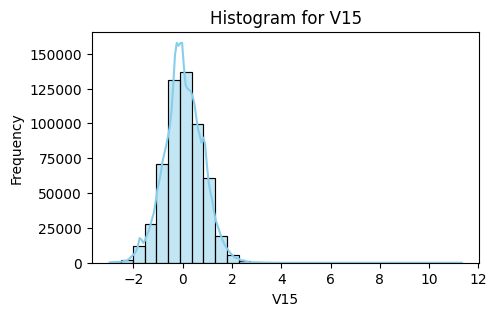

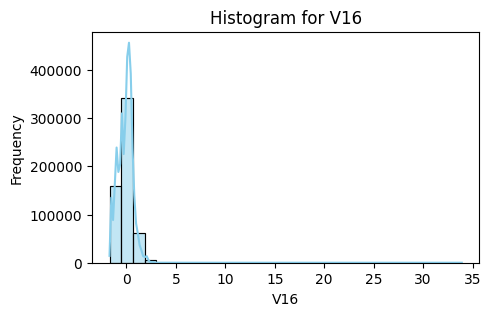

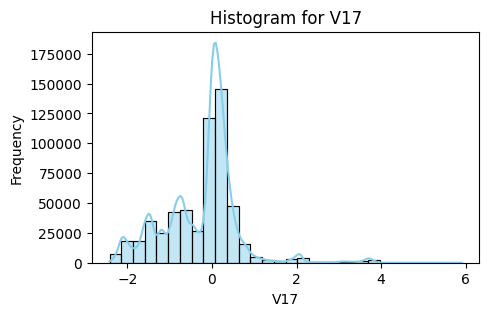

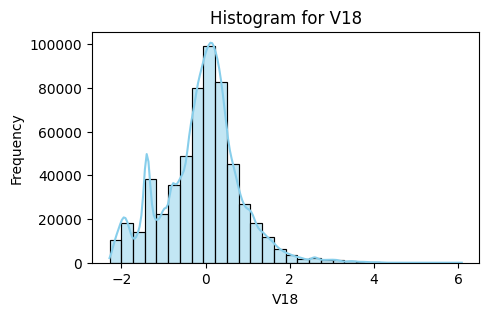

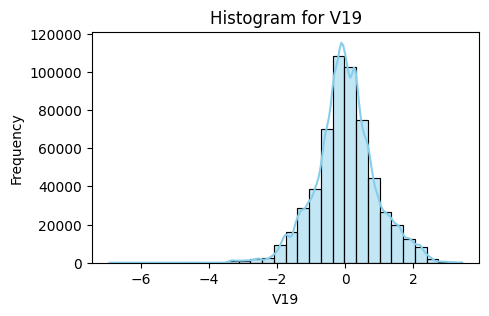

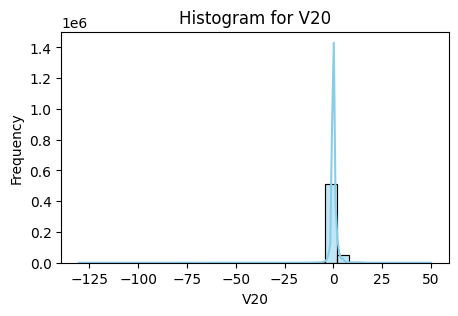

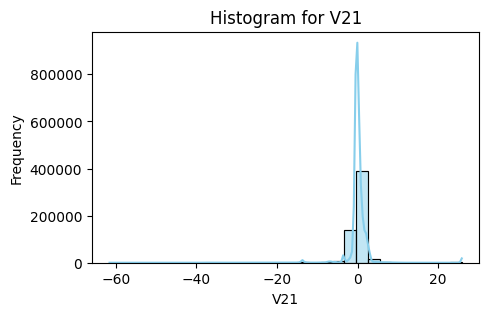

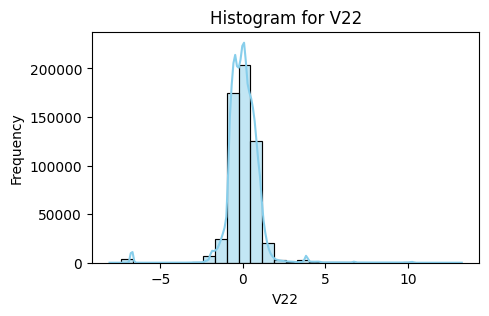

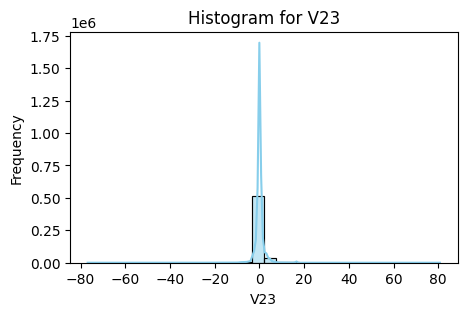

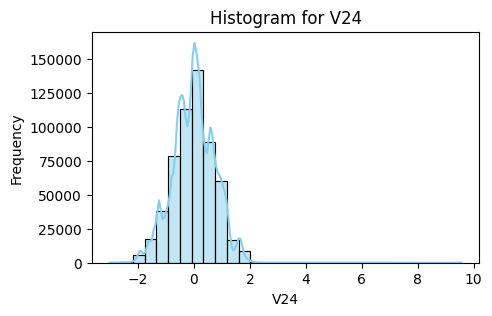

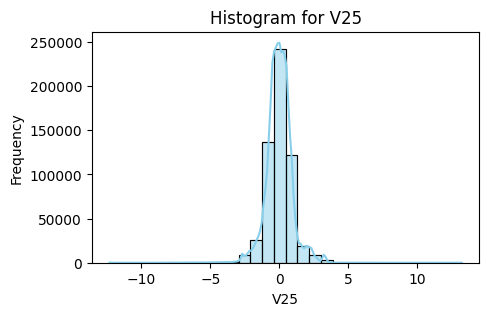

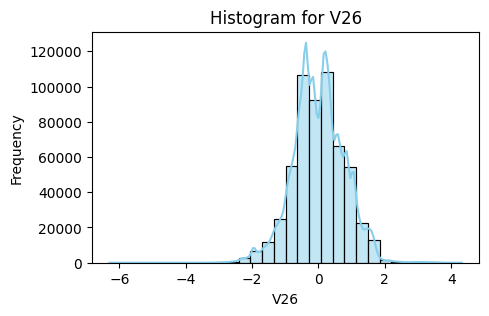

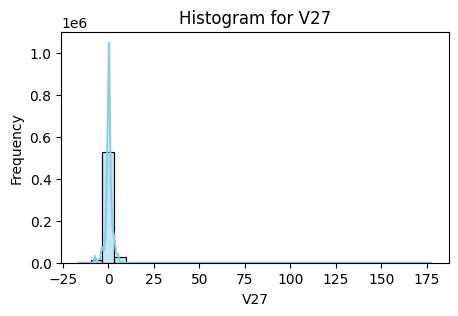

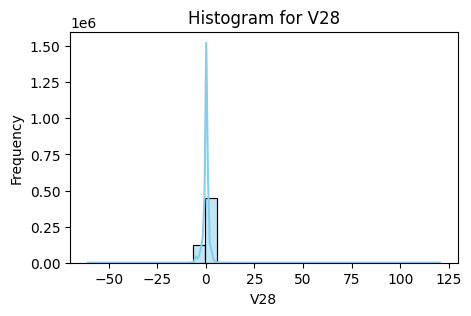

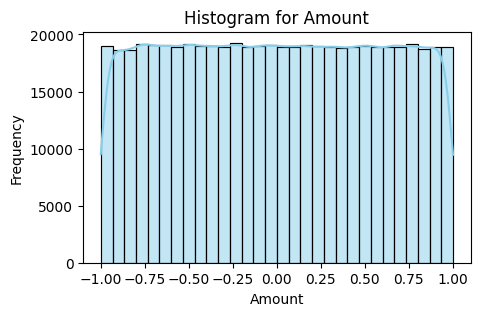

In [ ]:
for column in X_scaled.columns:
  # Plot a histogram
  plt.figure(figsize=(5, 3))
  plt.title(f'Histogram for {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  sns.histplot(x= X_scaled[column], bins=30, kde=True, color='skyblue')
  plt.show()


## Data Preprocessing

We have already completed a portion of the data preprocessing in the previous steps. At this stage, we have obtained our features, represented as variables X, and our target field y. Before proceeding with model creation, let's divide the dataset into training and testing subsets.

In [ ]:
from sklearn.model_selection import train_test_split
# Let's split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2024, stratify=y)
# Check the shape of the training features (X_train)
print("Training Features (X_train) Shape:", X_train.shape)

# Check the shape of the testing features (X_test)
print("Testing Features (X_test) Shape:", X_test.shape)

# Check the shape of the training target variable (y_train)
print("Training Target (y_train) Shape:", y_train.shape)

# Check the shape of the testing target variable (y_test)
print("Testing Target (y_test) Shape:", y_test.shape)


Training Features (X_train) Shape: (454904, 29)
Testing Features (X_test) Shape: (113726, 29)
Training Target (y_train) Shape: (454904, 1)
Testing Target (y_test) Shape: (113726, 1)


The observed shape of y is not as anticipated. To align with the required format of a 1D array, let's reshape y to (n_samples, ).

In [ ]:
# Reshape y to 1D array.
y_train = y_train.iloc[:, 0].values.ravel()
y_test = y_test.iloc[:, 0].values.ravel()

# Check the shape of the training target variable (y_train)
print("Training Target (y_train) Shape:", y_train.shape)

# Check the shape of the testing target variable (y_test)
print("Testing Target (y_test) Shape:", y_test.shape)

Training Target (y_train) Shape: (454904,)
Testing Target (y_test) Shape: (113726,)



Now that we have verified the integrity of the data and divided it into training and testing subsets, let's proceed to construct data models.

## Data Modeling
We will generate several models and assess both their time efficiency and accuracy in order to determine the most optimal model.

In [ ]:
# We'll establish an array to store the outcomes of the models.
models =[]

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=2024)

# Start time
start_time = time.time()

# Train the model on the training data
model.fit(X_train, y_train)

# Calculate time taken
elapsed_time = time.time() - start_time

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9652586040131544
Confusion Matrix:
 [[55681  1182]
 [ 2769 54094]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.97     56863
           1       0.98      0.95      0.96     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [ ]:
# Store the result of the logistic regression
models.append({"Name":"LogisticRegression","Accuracy":accuracy, "Time":elapsed_time})
print(models[-1])

[{'Name': 'LogisticRegression', 'Accuracy': 0.9652586040131544, 'Time': 5.228230714797974}]


### Decision Tree - (With tunning)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import time

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [10, 20, 30]
}

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2024)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='accuracy', cv=5)

# Start time
start_time = time.time()

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the Best Parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Model with Best Hyperparameters
best_dt = DecisionTreeClassifier(**best_params, random_state=2024)
best_dt.fit(X_train, y_train)

# Calculate time taken
elapsed_time = time.time() - start_time

# Make Predictions and Evaluate
y_pred = best_dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'max_depth': 30}
Accuracy on Test Set: 0.9978193201202891


In [ ]:
# Store the result of the decision tree with tunning
models.append({"Name":"DecisionTreeWithTunning","Accuracy":accuracy, "Time":elapsed_time})
print(models[-1])

[{'Name': 'LogisticRegression', 'Accuracy': 0.9652586040131544, 'Time': 5.228230714797974}, {'Name': 'DecisionTreeWithTunning', 'Accuracy': 0.9978193201202891, 'Time': 652.0396044254303}]


### Decision Tree - (Without tunning)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [10, 20, 30]
}

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=2024)

# Start time
start_time = time.time()

# Train the Model with Best Hyperparameters
dt.fit(X_train, y_train)

# Calculate time taken
elapsed_time = time.time() - start_time

# Make Predictions and Evaluate
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.9979512160807555


In [ ]:
# Store the result of the decision tree without tunning
models.append({"Name":"DecisionTreeWithoutTunning","Accuracy":accuracy, "Time":elapsed_time})
print(models[-1])

[{'Name': 'LogisticRegression', 'Accuracy': 0.9652586040131544, 'Time': 5.228230714797974}, {'Name': 'DecisionTreeWithTunning', 'Accuracy': 0.9978193201202891, 'Time': 652.0396044254303}, {'Name': 'DecisionTreeWithoutTunning', 'Accuracy': 0.9979512160807555, 'Time': 57.39052963256836}]


### Random Forest

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize the RandomForestClassifier
rf = RandomForestClassifier(random_state=2024)

# Start time
start_time = time.time()

# Train the Model
rf.fit(X_train, y_train)

# Calculate time taken
elapsed_time = time.time() - start_time

# Make Predictions and Evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.9998593109755025


In [ ]:
# Store the result of the random forest
models.append({"Name":"RandomForest","Accuracy":accuracy, "Time":elapsed_time})
print(models[-1])

[{'Name': 'LogisticRegression', 'Accuracy': 0.9652586040131544, 'Time': 5.228230714797974}, {'Name': 'DecisionTreeWithTunning', 'Accuracy': 0.9978193201202891, 'Time': 652.0396044254303}, {'Name': 'DecisionTreeWithoutTunning', 'Accuracy': 0.9979512160807555, 'Time': 57.39052963256836}, {'Name': 'RandomForest', 'Accuracy': 0.9998593109755025, 'Time': 568.9852793216705}]


### Gradient Boosting Classifier


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# Define the parameter distribution for RandomizedSearchCV
""""
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8]
}

"""
# Initialize the GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=2024)

# Initialize RandomizedSearchCV
"""
random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist, n_iter=5,
                                   scoring='accuracy', cv=5, random_state=2024)
"""

# Start time
start_time = time.time()

# Perform RandomizedSearchCV
"""
random_search.fit(X_train, y_train)
"""

# Get the Best Parameters
"""
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
"""

# Train the Model
gb = GradientBoostingClassifier(random_state=2024)
gb.fit(X_train, y_train)

# Calculate time taken
elapsed_time = time.time() - start_time

# Make Predictions and Evaluate
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.9790725076060004


In [ ]:

# Store the result of the gradient boosting classifier
models.append({"Name":"GradientBoostingClassifier","Accuracy":accuracy, "Time":elapsed_time})
print(models[-1])

[{'Name': 'LogisticRegression', 'Accuracy': 0.9652586040131544, 'Time': 5.228230714797974}, {'Name': 'DecisionTreeWithTunning', 'Accuracy': 0.9978193201202891, 'Time': 652.0396044254303}, {'Name': 'DecisionTreeWithoutTunning', 'Accuracy': 0.9979512160807555, 'Time': 57.39052963256836}, {'Name': 'RandomForest', 'Accuracy': 0.9998593109755025, 'Time': 568.9852793216705}, {'Name': 'GradientBoostingClassifier', 'Accuracy': 0.9790725076060004, 'Time': 933.0302810668945}]


### SVM


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define the parameter distribution for RandomizedSearchCV
"""
param_dist = {
    'C': [1, 5, 10]
}
"""

# Initialize the Support Vector Classification (SVC)
svc = SVC(random_state=2024)

# Initialize RandomizedSearchCV
"""
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_dist,
                                   scoring='accuracy', cv=5, random_state=2024)
"""

# Start time
start_time = time.time()

# Perform RandomizedSearchCV
"""
random_search.fit(X_train, y_train)

# Get the Best Parameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)
"""

# Train the Model with Best Hyperparameters
svc = SVC(random_state=2024)
svc.fit(X_train, y_train)

# Calculate time taken
elapsed_time = time.time() - start_time

# Make Predictions and Evaluate
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)

Accuracy on Test Set: 0.9908727995357263


In [ ]:
# Store the result of the svc
models.append({"Name":"svc","Accuracy":accuracy, "Time":elapsed_time})
print(models[-1])

{'Name': 'svc', 'Accuracy': 0.9908727995357263, 'Time': 1632.231202840805}


## Assessment
The assessment of the aforementioned models can be conducted based on both time efficiency and accuracy. Let's visualize and verify these aspects in the forthcoming plots.

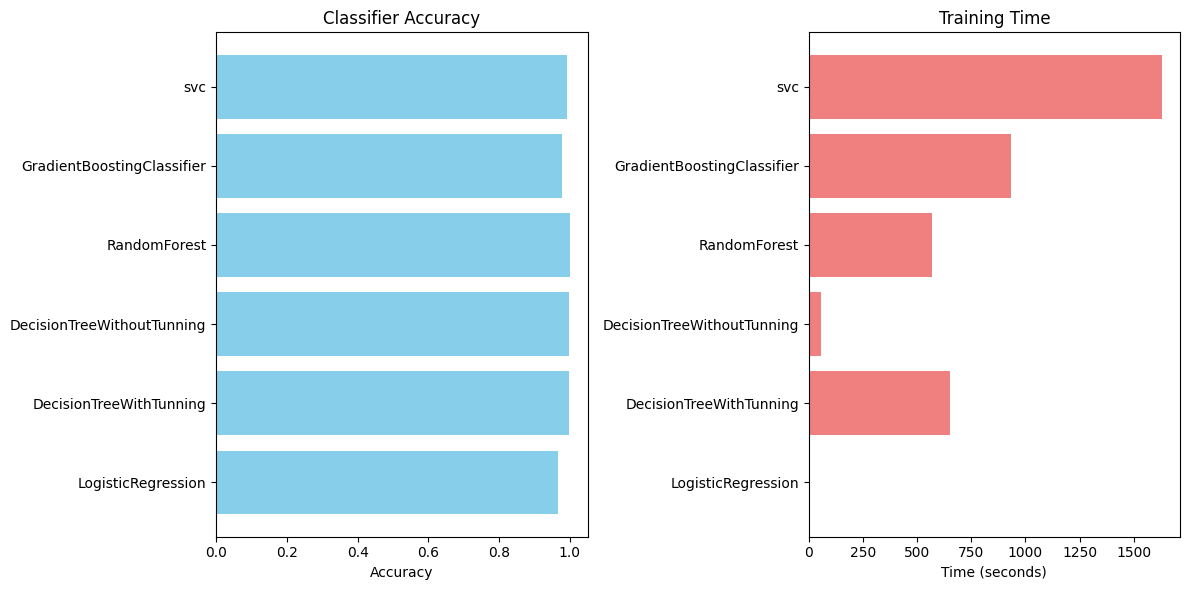

In [ ]:
# Extracting information for plotting
names = [entry['Name'] for entry in models]
accuracies = [entry['Accuracy'] for entry in models]
times = [entry['Time'] for entry in models]

# Plotting accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

# Plotting time
plt.subplot(1, 2, 2)
plt.barh(names, times, color='lightcoral')
plt.xlabel('Time (seconds)')
plt.title('Training Time')

plt.tight_layout()
plt.show()

Based on the visualizations provided earlier, it's evident that there isn't a substantial variance in accuracy across the models. However, both Logistic Regression and Decision Tree without tuning exhibit notably swift performance. Particularly, the Decision Tree without tuning strikes an impressive balance between efficiency and effectiveness. Therefore, it's reasonable to conclude that the Decision Tree outperforms the other models in terms of overall performance.

# Conclusion

During the course of the project, we thoroughly examined the gathered data through exploratory data analysis. Subsequently, we constructed various models, conducted comparisons, and ultimately selected the optimal model by striking a balance between efficiency and effectiveness. Although the specific meaning of each feature remains undisclosed due to data policy constraints, this project serves as a valuable opportunity for honing our skills in model creation.